In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
# Define file paths for each state's dataset
file_paths = {
    "Alabama": "data/Alabama 2020-2025 lions mane.csv",
    "Georgia": "data/Georgia 2020-2025 lions mane.csv",
    "Florida": "data/Florida 2020-2025 lions mane.csv",
    "Mississippi": "data/Mississippi 2020-2025 lions mane.csv",
    "Tennessee": "data/Tennessee 2020-2025 lions mane.csv",
    "The Carolinas": "data/The Carolinas 2020-2025 lions mane.csv"
}

# Load and merge all datasets
dataframes = []
for state, path in file_paths.items():
    df = pd.read_csv(path)
    df["State"] = state  # Add state column
    df["observed_on"] = pd.to_datetime(df["observed_on"], errors='coerce')  # Convert to datetime
    dataframes.append(df)

# Combine all state data into one DataFrame
data = pd.concat(dataframes)

print(data.head())

         id                                  uuid  \
0  37226024  f2af7bf6-2c2b-43fd-a4c5-77f1c289643d   
1  37977556  33a69fcf-507f-41d6-93cf-10afb42e7691   
2  38327321  c26bfe47-6ed7-4155-8b43-5032384ad522   
3  38431375  192bb3df-ff6e-4cdb-b741-35833ad2dbb9   
4  38745893  e897f060-a7e4-4880-bb4f-41c227756034   

                        observed_on_string observed_on  \
0                2020-01-01 4:34:00 PM CST  2020-01-01   
1                   2020/01/25 1:32 PM CST  2020-01-25   
2  Wed Feb 05 2020 08:27:30 GMT-0600 (CST)  2020-02-05   
3  Sat Feb 08 2020 12:01:46 GMT-0600 (CST)  2020-02-08   
4  Sun Feb 16 2020 16:40:03 GMT-0600 (CST)  2020-02-16   

          time_observed_at                   time_zone  user_id  \
0  2020-01-01 16:34:00 UTC                         UTC  1725805   
1  2020-01-25 19:32:00 UTC  Central Time (US & Canada)    24631   
2  2020-02-05 08:27:30 UTC                         UTC  2545750   
3  2020-02-08 18:01:46 UTC  Central Time (US & Canada)   499293 

In [41]:
# Extract Year and Month for analysis
data['Year'] = data['observed_on'].dt.year
data['Month'] = data['observed_on'].dt.month

# Aggregate data for visualization
yearly_data = data.groupby(["Year", "State"]).size().unstack()
monthly_data = data.groupby(["Year", "Month", "State"]).size().unstack()

# Fill missing values with 0
yearly_data = yearly_data.fillna(0)
monthly_data = monthly_data.fillna(0)

# Reset index for proper plotting
monthly_data_reset = monthly_data.reset_index()

# Create a new 'Date' column by properly combining 'Year' and 'Month'
monthly_data_reset["Date"] = pd.to_datetime(
    monthly_data_reset["Year"].astype(str) + "-" + monthly_data_reset["Month"].astype(str) + "-01"
)

# Set 'Date' as index
monthly_data_reset.set_index("Date", inplace=True)

<Figure size 1200x600 with 0 Axes>

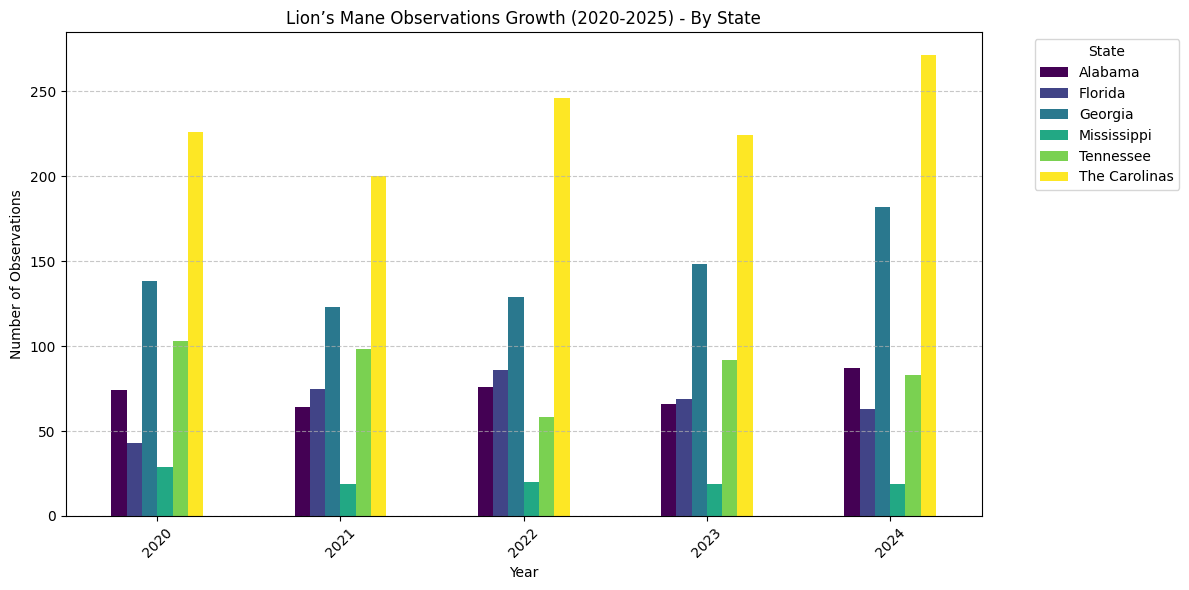

In [42]:
# Plot 1: Bar Chart - Observation Growth Over Time by State
plt.figure(figsize=(12, 6))
yearly_data.plot(kind="bar", stacked=False, colormap="viridis", figsize=(12, 6))
plt.title("Lion’s Mane Observations Growth (2020-2025) - By State")
plt.xlabel("Year")
plt.ylabel("Number of Observations")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

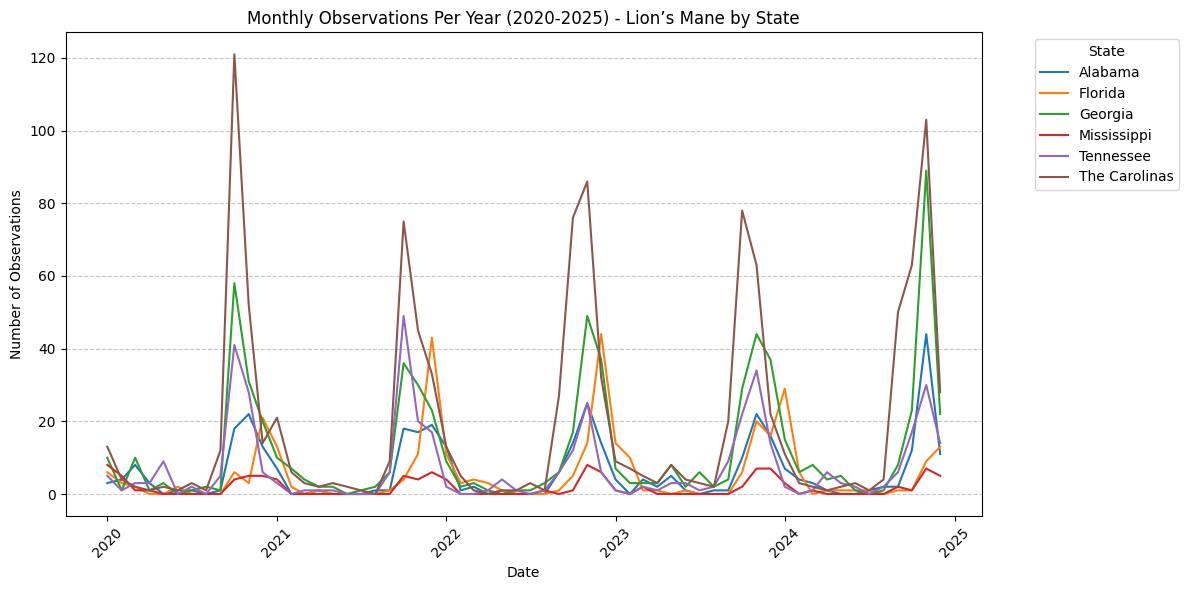

In [43]:

# Plot 2: Line Graph - Monthly Observations Per Year by State
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data_reset.drop(columns=["Year", "Month"]), dashes=False, palette="tab10")
plt.title("Monthly Observations Per Year (2020-2025) - Lion’s Mane by State")
plt.xlabel("Date")
plt.ylabel("Number of Observations")
plt.xticks(rotation=45)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

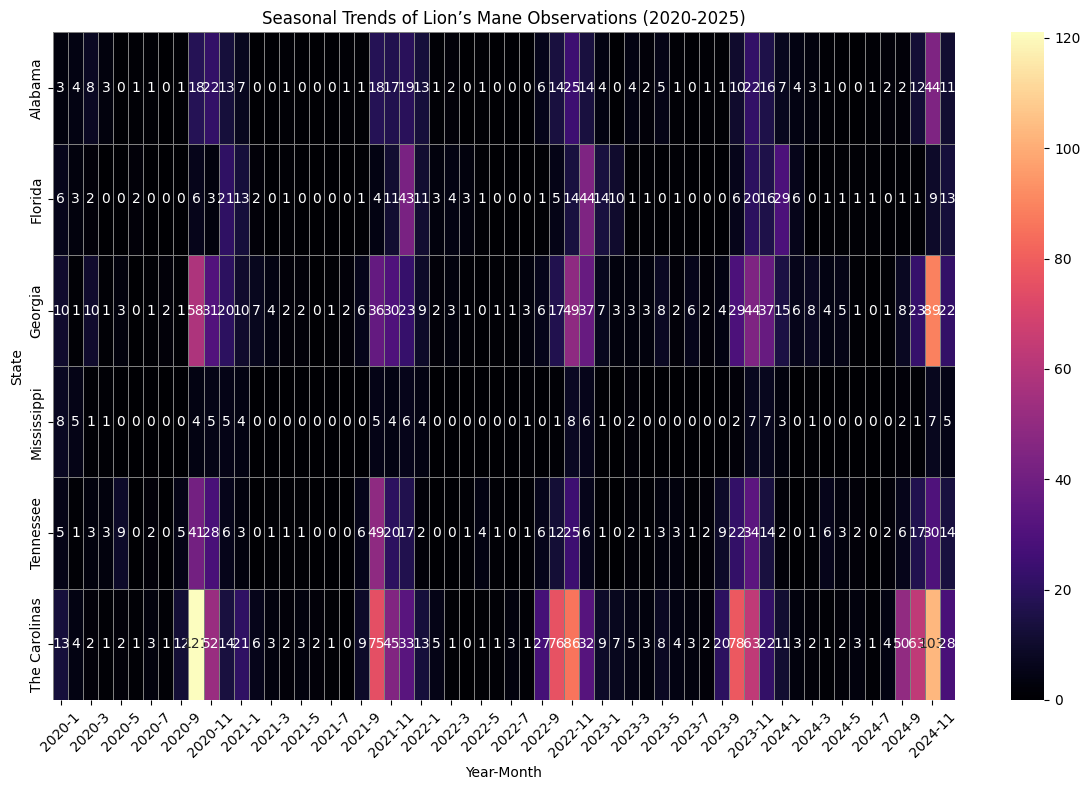

In [44]:
# Advanced Visualization: Heatmap for Seasonal Trends by State
plt.figure(figsize=(12, 8))
sns.heatmap(
    monthly_data.T, cmap="magma", linewidths=0.5, linecolor="gray", annot=True, fmt="g"
)
plt.title("Seasonal Trends of Lion’s Mane Observations (2020-2025)")
plt.xlabel("Year-Month")
plt.ylabel("State")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()